<a href="https://colab.research.google.com/github/NaomyChemungor/healthriskprediction/blob/main/A_Capstone_Project_Predicting_Health_Risks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path ='/content/drive/MyDrive/__Capstone_Project/Data/human_vital_signs_dataset_2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

# Display basic information about the dataset
print("Basic Information About the Dataset:")
print(data.info())


   Patient ID  Heart Rate  Respiratory Rate                   Timestamp  \
0           1          60                12  2024-07-19 21:53:45.729841   
1           2          63                18  2024-07-19 21:52:45.729841   
2           3          63                15  2024-07-19 21:51:45.729841   
3           4          99                16  2024-07-19 21:50:45.729841   
4           5          69                16  2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0         36.861707          95.702046                      124   
1         36.511633          96.689413                      126   
2         37.052049          98.508265                      131   
3         36.654748          95.011801                      118   
4         36.975098          98.623792                      138   

   Diastolic Blood Pressure  Age  Gender  Weight (kg)  Height (m)  \
0                        86   37  Female    91.541618    1.679351   
1       

### Data Preprocessing,EDA,Encoding Normalization

Check for Initial Missing Values

In [ ]:
# Use isnull() and sum() to get the count of missing values in each column
missing_values_initial = data.isnull().sum()

# Display the missing values count for each column
print("Initial Missing Values in Each Column:")
print(missing_values_initial)


Initial Missing Values in Each Column:
Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64


Check for incorrect data types

In [ ]:
# Step 1: Display all column names in the dataset
print("Column Names in the Dataset:")
print(data.columns)

# Step 2: Strip leading/trailing spaces from all column names (if any)
data.columns = data.columns.str.strip()

# Step 3: Check for incorrect data types by comparing with expected types
expected_data_types = {
    'Body Temperature': 'float64',
    'Derived_Pulse_Pressure': 'int64',
    'Systolic Blood Pressure': 'int64',

}

# Step 4: Identify columns with incorrect data types
incorrect_data_types = {}
for column, expected_type in expected_data_types.items():
    if column in data.columns:  # Check if the column exists in the dataset
        actual_type = data[column].dtype
        if actual_type != expected_type:
            incorrect_data_types[column] = (actual_type, expected_type)
    else:
        print(f"Warning: Column '{column}' not found in the dataset.")

# Step 5: Display columns with incorrect data types
if incorrect_data_types:
    print("\nColumns with Incorrect Data Types:")
    for column, (actual, expected) in incorrect_data_types.items():
        print(f"{column}: Expected {expected}, but got {actual}")
else:
    print("\nAll columns have the correct data types.")


Column Names in the Dataset:
Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

All columns have the correct data types.


## **EDA**

Summary Statistics

In [ ]:
# Exclude 'Patient ID' column from summary statistics
data_without_patient_id = data.drop(columns=['Patient ID'])

# Display summary statistics
print("\nSummary Statistics (excluding 'Patient ID'):")
print(data_without_patient_id.describe())


Summary Statistics (excluding 'Patient ID'):
          Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
count  200020.000000     200020.000000     200020.000000      200020.000000   
mean       79.533747         15.489451         36.748353          97.504372   
std        11.552894          2.294472          0.433290           1.442598   
min        60.000000         12.000000         36.000004          95.000007   
25%        70.000000         13.000000         36.372613          96.256859   
50%        80.000000         15.000000         36.747741          97.509629   
75%        90.000000         17.000000         37.123003          98.755722   
max        99.000000         19.000000         37.499992          99.999963   

       Systolic Blood Pressure  Diastolic Blood Pressure            Age  \
count            200020.000000             200020.000000  200020.000000   
mean                124.437971                 79.499625      53.446275   
std              

Distributions of numerical features

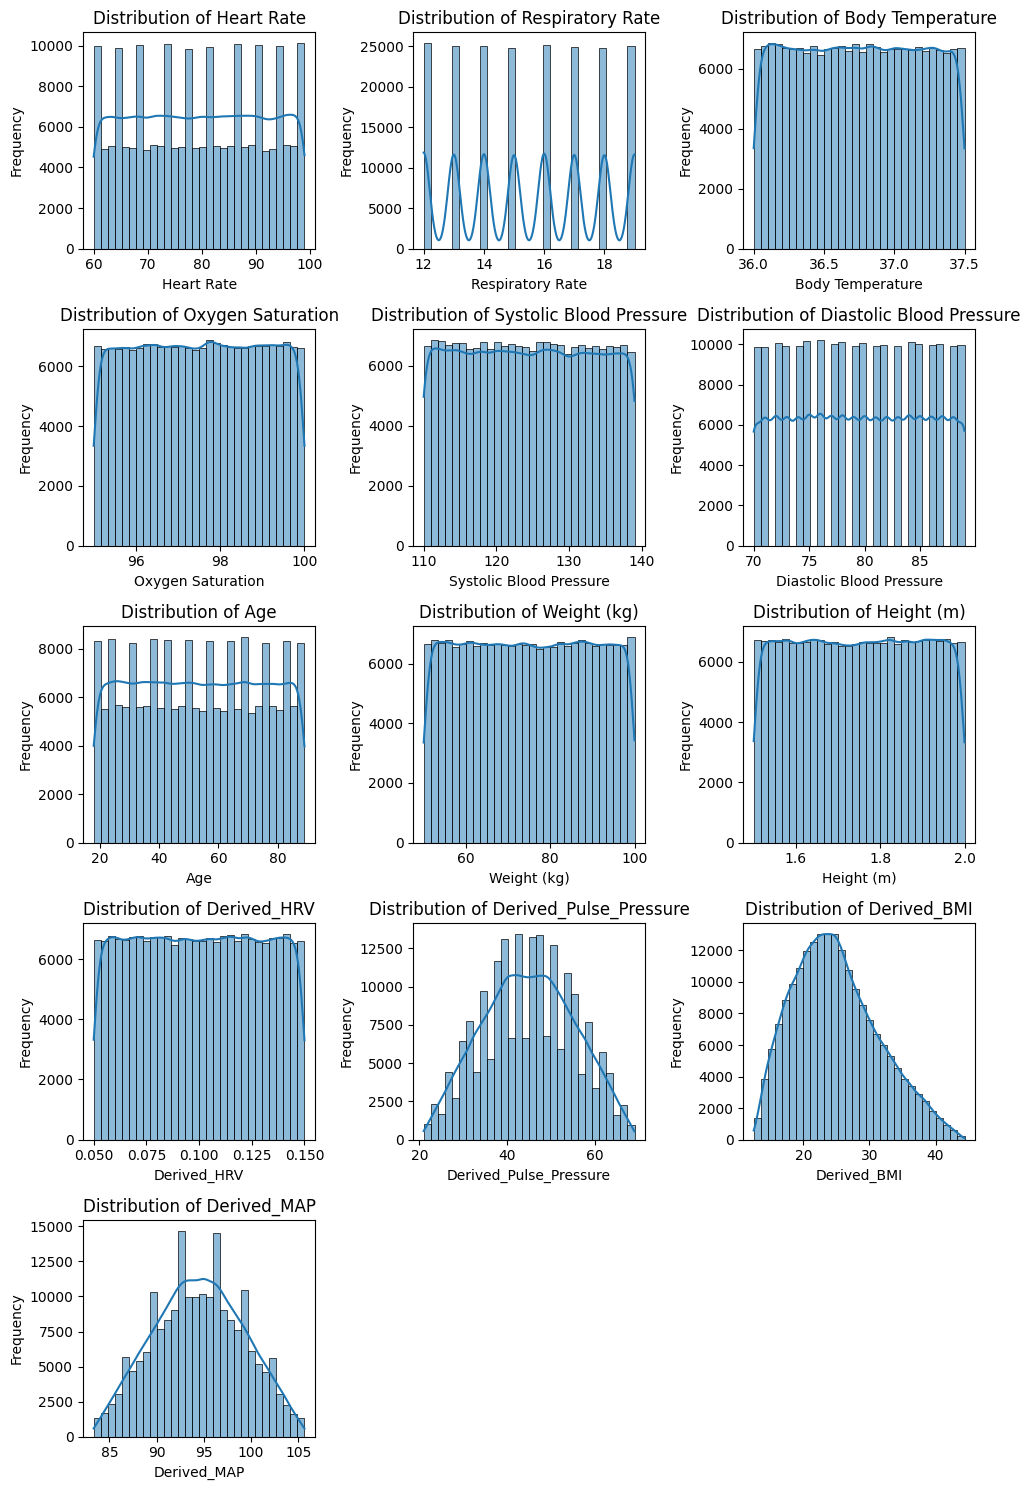

In [ ]:
# Visualizing distributions of numerical features using subplots (excluding 'Patient ID')
numerical_columns = data.select_dtypes(include=['number']).columns

# Exclude 'Patient ID' from numerical columns
numerical_columns = numerical_columns[numerical_columns != 'Patient ID']

# Determine the number of rows and columns for the subplots based on the number of numerical features
num_columns = len(numerical_columns)
num_rows = (num_columns // 3) + 1  # Adjust the number of rows to fit all subplots (3 columns per row)

# Create a figure and subplots with even smaller size
plt.figure(figsize=(10, num_rows * 3))  # Even smaller subplots, adjust as necessary

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Arrange in a grid of num_rows x 3
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Visualizing count plots for categorical variables

Counts for Gender:
Gender
Female    100117
Male       99903
Name: count, dtype: int64
Total count for Gender: 200020
----------------------------------------
Counts for Risk Category:
Risk Category
High Risk    105115
Low Risk      94905
Name: count, dtype: int64
Total count for Risk Category: 200020
----------------------------------------


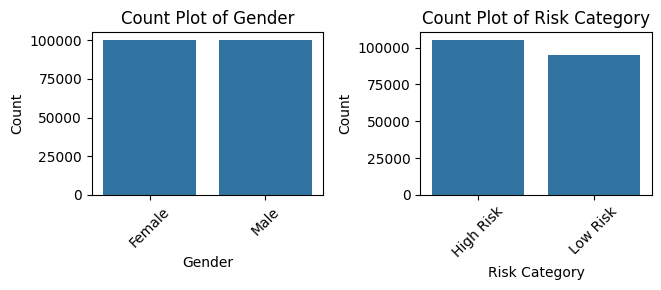

In [ ]:
# Visualizing distributions of categorical features using subplots (e.g., 'Gender', 'Risk Category')
categorical_columns = ['Gender', 'Risk Category']  # Specify your categorical columns

# Print the count of each category for the specified columns
for col in categorical_columns:
    print(f"Counts for {col}:")
    print(data[col].value_counts())
    print(f"Total count for {col}: {data[col].count()}")
    print("-" * 40)  # Separator for clarity

# Determine the number of rows and columns for the subplots based on the number of categorical features
num_columns = len(categorical_columns)
num_rows = (num_columns // 3) + 1  # Adjust the number of rows to fit all subplots (3 columns per row)

# Create a figure and subplots with a smaller size
plt.figure(figsize=(10, num_rows * 3))  # Adjust the figure size for the subplots

# Loop through the categorical columns and create a subplot for each
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Arrange in a grid of num_rows x 3
    sns.countplot(data=data, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Detecting outliers using box plots

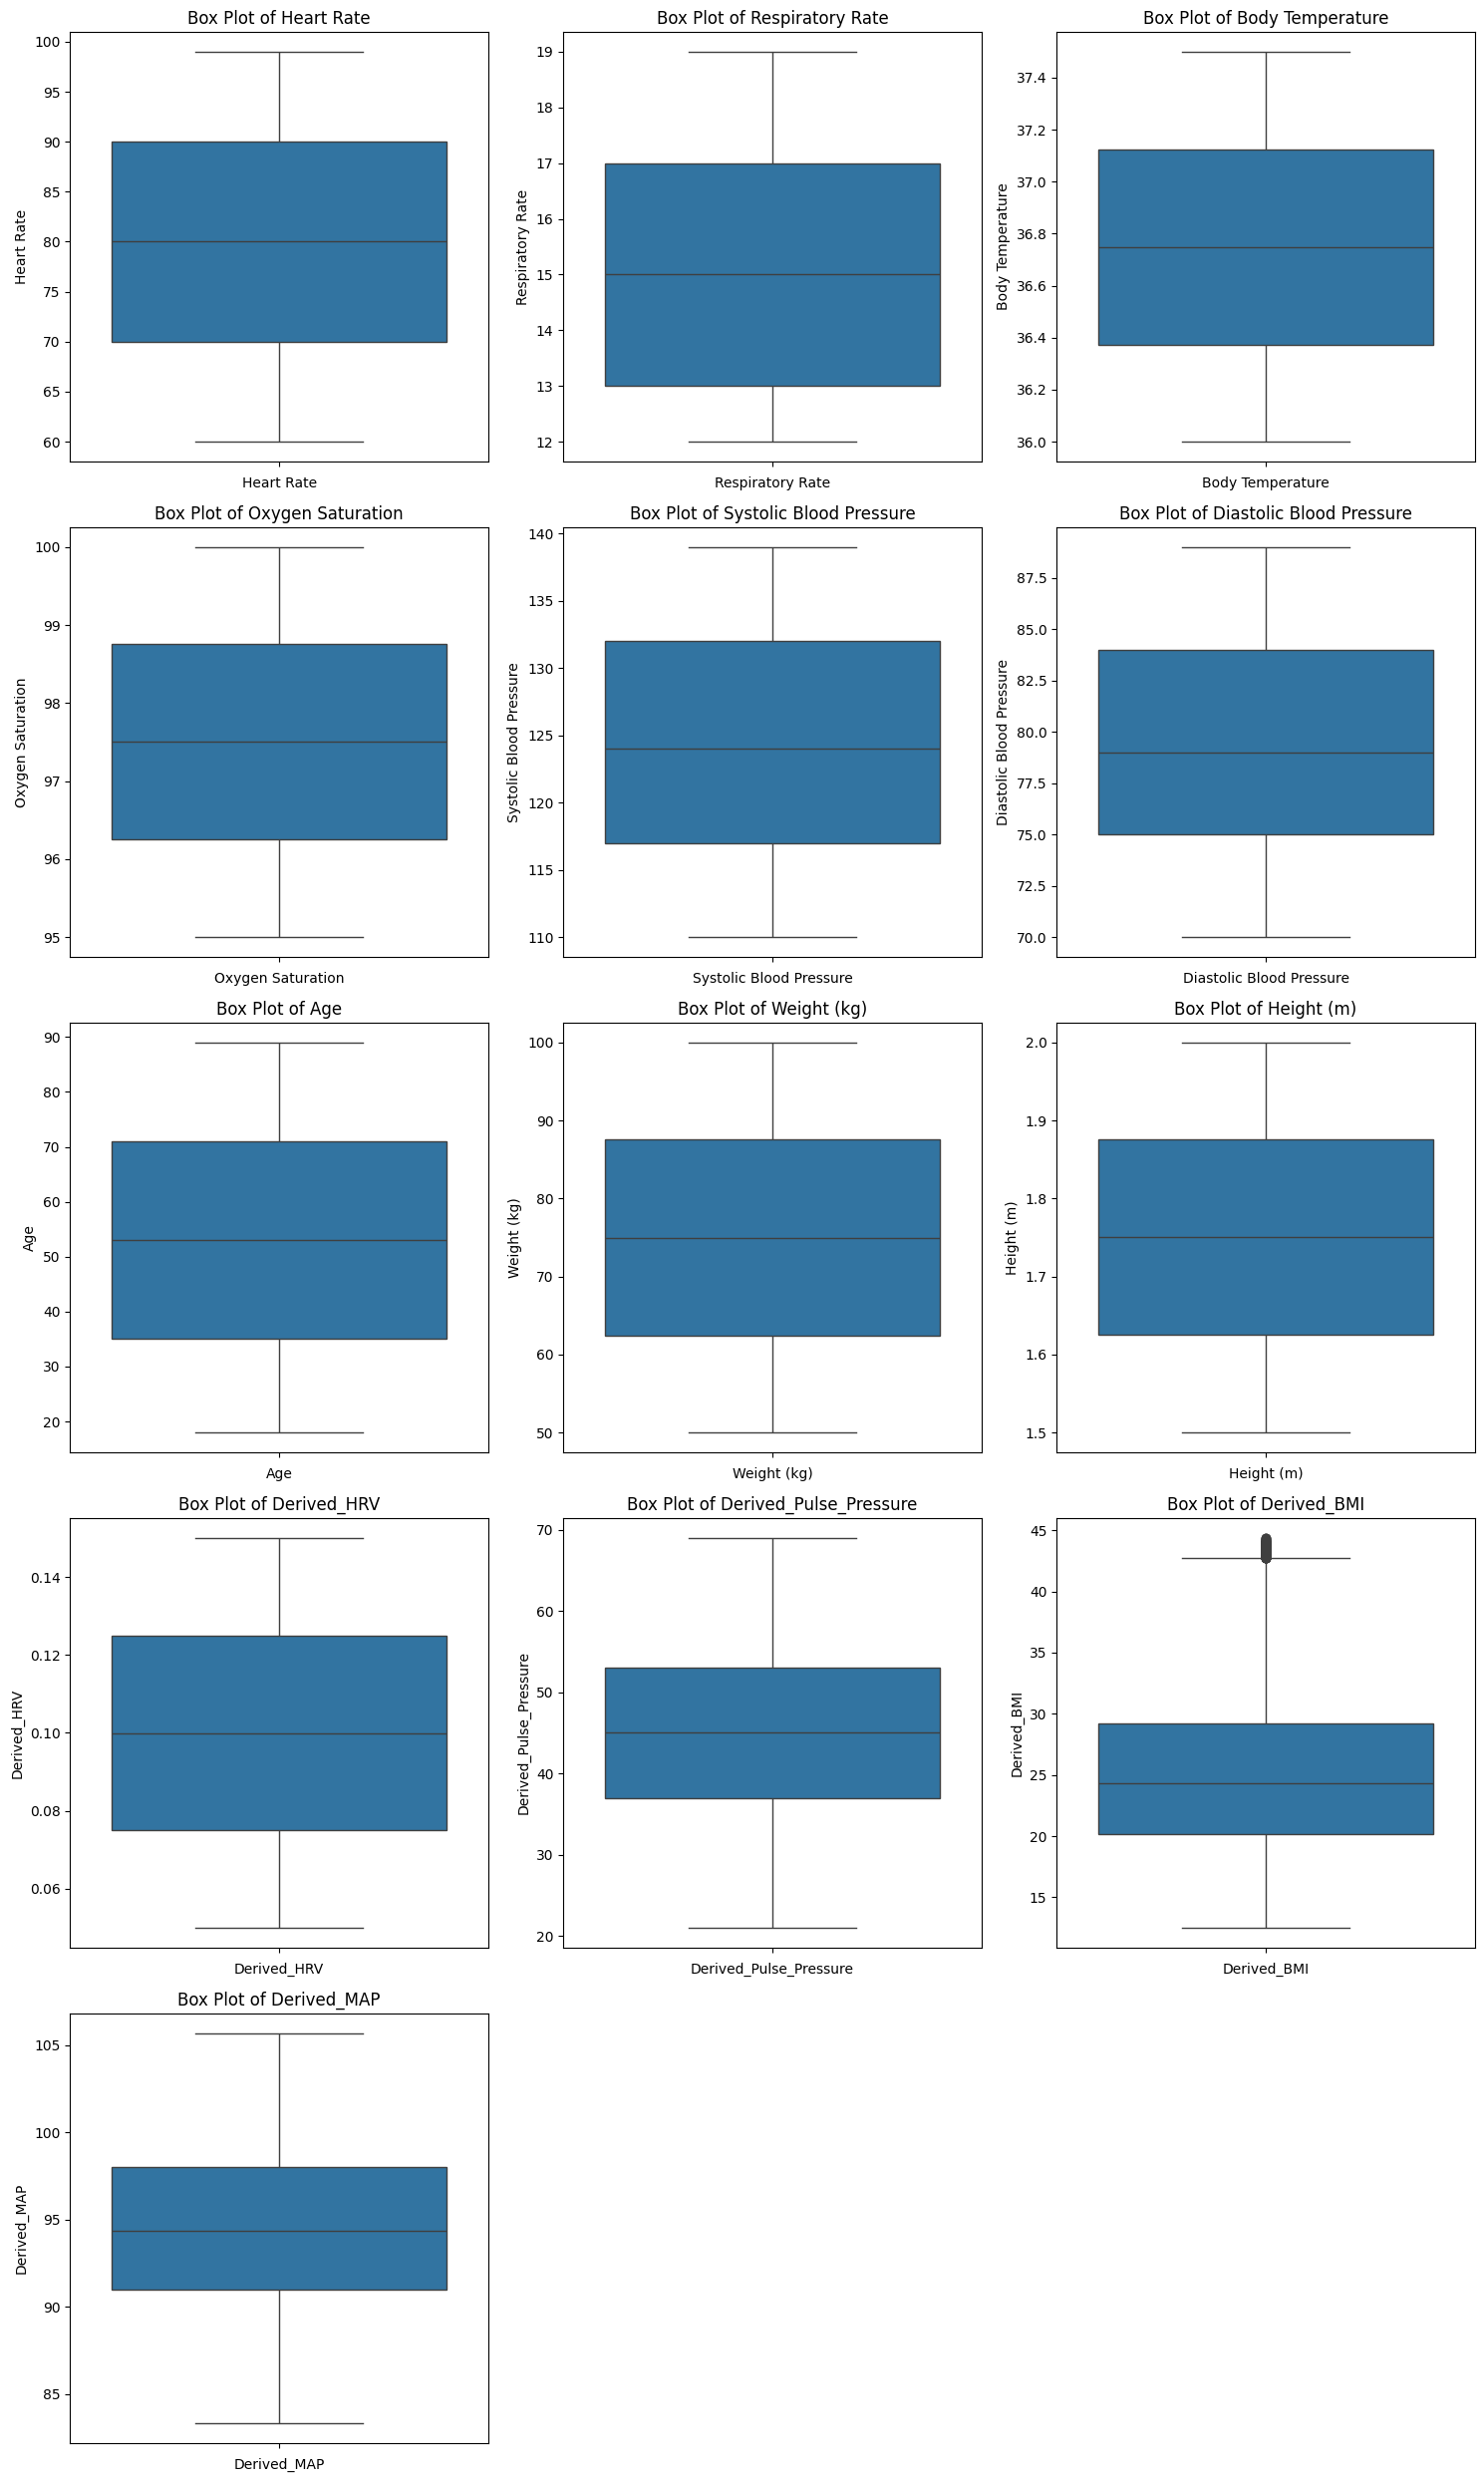

In [ ]:
# Visualizing box plots of numerical features using subplots (excluding 'Patient ID')
numerical_columns = data.select_dtypes(include=['number']).columns

# Exclude 'Patient ID' from numerical columns
numerical_columns = numerical_columns[numerical_columns != 'Patient ID']

# Determine the number of rows and columns for the subplots based on the number of numerical features
num_columns = len(numerical_columns)

# Adjust number of columns per row (e.g., 3 or 4 depending on preference)
columns_per_row = 3

# Ensure that the number of rows is calculated correctly
num_rows = (num_columns // columns_per_row) + (1 if num_columns % columns_per_row > 0 else 0)

# Create a figure for the subplots
plt.figure(figsize=(columns_per_row * 5, num_rows * 5))

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)  # Arrange in a grid of num_rows x columns_per_row
    sns.boxplot(data=data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Converting columns gender and Risk Category into one-hot encoding

In [ ]:
# Convert 'Gender' and 'Risk Category' columns into one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'Risk Category'], drop_first=False)

# Display the first few rows of the transformed data
print("\nData After One-Hot Encoding:")
print(data_encoded.head())



Data After One-Hot Encoding:
   Patient ID  Heart Rate  Respiratory Rate                   Timestamp  \
0           1          60                12  2024-07-19 21:53:45.729841   
1           2          63                18  2024-07-19 21:52:45.729841   
2           3          63                15  2024-07-19 21:51:45.729841   
3           4          99                16  2024-07-19 21:50:45.729841   
4           5          69                16  2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0         36.861707          95.702046                      124   
1         36.511633          96.689413                      126   
2         37.052049          98.508265                      131   
3         36.654748          95.011801                      118   
4         36.975098          98.623792                      138   

   Diastolic Blood Pressure  Age  Weight (kg)  Height (m)  Derived_HRV  \
0                        86   37    91.541

Normalize all the colums in the data

In [ ]:
# Select only numerical columns for normalization
numerical_columns = data_encoded.select_dtypes(include=['number']).columns

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Normalize only numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display the normalized data
print("\nData After Normalization:")
print(data_encoded.head())

# Print the names of the normalized columns
print("\nAll Columns:")
for column in data_encoded:
    print(column)


Data After Normalization:
   Patient ID  Heart Rate  Respiratory Rate                   Timestamp  \
0    0.000000    0.000000          0.000000  2024-07-19 21:53:45.729841   
1    0.000005    0.076923          0.857143  2024-07-19 21:52:45.729841   
2    0.000010    0.076923          0.428571  2024-07-19 21:51:45.729841   
3    0.000015    1.000000          0.571429  2024-07-19 21:50:45.729841   
4    0.000020    0.230769          0.571429  2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0          0.574473           0.140409                 0.482759   
1          0.341088           0.337884                 0.551724   
2          0.701369           0.701658                 0.724138   
3          0.436499           0.002359                 0.275862   
4          0.650068           0.724763                 0.965517   

   Diastolic Blood Pressure       Age  Weight (kg)  Height (m)  Derived_HRV  \
0                  0.842105  0.267606   

**KEY FEATURES RQ1**:What are the key features for predicting patient health risk levels from unique health data?

In [ ]:
import pandas as pd
from scipy import stats

# Check the column names of the dataframe after encoding
print(data_encoded.columns)

# Strip leading/trailing spaces from column names just in case
data_encoded.columns = data_encoded.columns.str.strip()

# List of numerical columns (excluding the 'Risk Category' columns, which are now encoded)
numerical_columns = ['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
                     'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)',
                     'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
                     'Derived_MAP']


# Now, using the encoded risk columns (e.g., 'Risk Category_High Risk' and 'Risk Category_Low Risk')
# Create the low and high risk groups based on the encoded values (1 or 0)

# 1. **T-test**: For comparing two risk levels (e.g., comparing "High Risk" vs "Low Risk")
high_risk = data_encoded[data_encoded['Risk Category_High Risk'] == 1]  # High risk patients
low_risk = data_encoded[data_encoded['Risk Category_Low Risk'] == 1]  # Low risk patients

# Perform t-test for each numerical column
t_test_results = {}
for column in numerical_columns:
    t_stat, p_value = stats.ttest_ind(low_risk[column], high_risk[column], nan_policy='omit')
    t_test_results[column] = (t_stat, p_value)

# Display t-test results
print("\nT-test Results (Low risk vs High risk):")
for column, (t_stat, p_value) in t_test_results.items():
    result = "Reject Null Hypothesis (Significant difference)" if p_value < 0.05 else "Accept Null Hypothesis (No significant difference)"
    print(f"{column}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f} -> {result}")

# 2. **ANOVA**: For comparing more than two risk levels (if any additional risk categories are encoded)
# Perform ANOVA for each numerical column
anova_results = {}
risk_levels = ['Risk Category_High Risk', 'Risk Category_Low Risk']  # List of encoded risk levels

for column in numerical_columns:
    # Group the data by the encoded Risk Category columns for ANOVA
    grouped_data = [data_encoded[data_encoded[category] == 1][column] for category in risk_levels]

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*grouped_data)
    anova_results[column] = (f_stat, p_value)

# Display ANOVA results
print("\nANOVA Results (Across risk levels):")
for column, (f_stat, p_value) in anova_results.items():
    result = "Reject Null Hypothesis (Significant difference)" if p_value < 0.05 else "Accept Null Hypothesis (No significant difference)"
    print(f"{column}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f} -> {result}")


Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
       'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP',
       'Gender_Female', 'Gender_Male', 'Risk Category_High Risk',
       'Risk Category_Low Risk'],
      dtype='object')

T-test Results (Low risk vs High risk):
Heart Rate: t-statistic = -177.2739, p-value = 0.0000 -> Reject Null Hypothesis (Significant difference)
Respiratory Rate: t-statistic = 0.5867, p-value = 0.5574 -> Accept Null Hypothesis (No significant difference)
Body Temperature: t-statistic = -0.5283, p-value = 0.5973 -> Accept Null Hypothesis (No significant difference)
Oxygen Saturation: t-statistic = 0.2917, p-value = 0.7705 -> Accept Null Hypothesis (No significant difference)
Systolic Blood Pressure: t-statistic = 1.5804, p-value = 0.1140 -> Accept Null Hypothesis (No significant

The analysis of various health metrics between low-risk and high-risk patients revealed significant differences in several key parameters.**Heart rate, weight, height, derived pulse pressure,and derived BMI** were all found to significantly differentiate between the two risk groups. Both t-tests and ANOVA tests provided consistent results for these variables, with heart rate showing the most significant difference (p-value = 0.0000), followed by weight (p-value = 0.0000), height (p-value = 0.0000), derived pulse pressure (p-value = 0.0273), and derived BMI (p-value = 0.0000). These findings suggest that these **factors, particularly heart rate, weight, and BMI,** are crucial in determining the health risk levels of patients. Healthcare providers can use these indicators to classify risk categories more accurately and assess patients' overall health status.

In contrast, other health parameters such as **respiratory rate, body temperature, oxygen saturation, systolic and diastolic blood pressure, age, and derived HRV (heart rate variability)** showed no significant differences between low-risk and high-risk patients. Both the t-test and ANOVA results for these variables indicated p-values well above the 0.05 threshold, suggesting that these factors do not play a major role in distinguishing between the two groups. Although these metrics are important for general health monitoring, they may not be reliable indicators for **risk categorization in this dataset**. Therefore, while monitoring respiratory rate, body temperature, and other variables remains essential, they might not be as effective in predicting the level of health risk.

In summary, while various health metrics were tested for their ability to differentiate between low-risk and high-risk patients, the results highlight a few key factors, such as heart rate, weight, height, derived pulse pressure, and derived BMI, as significant predictors of risk levels. These findings could help improve the accuracy of risk assessments and patient monitoring. On the other hand, variables like respiratory rate, blood pressure, and derived HRV, despite their clinical relevance, did not show substantial differences across risk categories, indicating they may not be as useful for distinguishing between risk levels in this specific dataset. This analysis suggests that healthcare professionals should prioritize certain variables, such as heart rate and BMI, in risk assessment and further explore their implications in clinical decision-making.

**Correlation Analysis**

Pearson correlation between Heart Rate and Risk Category: 0.37
Pearson correlation between Respiratory Rate and Risk Category: -0.00
Pearson correlation between Body Temperature and Risk Category: 0.00
Pearson correlation between Oxygen Saturation and Risk Category: -0.00
Pearson correlation between Systolic Blood Pressure and Risk Category: -0.00
Pearson correlation between Diastolic Blood Pressure and Risk Category: 0.00
Pearson correlation between Age and Risk Category: 0.00
Pearson correlation between Weight (kg) and Risk Category: 0.02
Pearson correlation between Height (m) and Risk Category: -0.09
Pearson correlation between Derived_HRV and Risk Category: -0.00
Pearson correlation between Derived_Pulse_Pressure and Risk Category: -0.00
Pearson correlation between Derived_BMI and Risk Category: 0.15
Pearson correlation between Derived_MAP and Risk Category: 0.00

Correlation Matrix:
                          Heart Rate  Respiratory Rate  Body Temperature  \
Heart Rate             

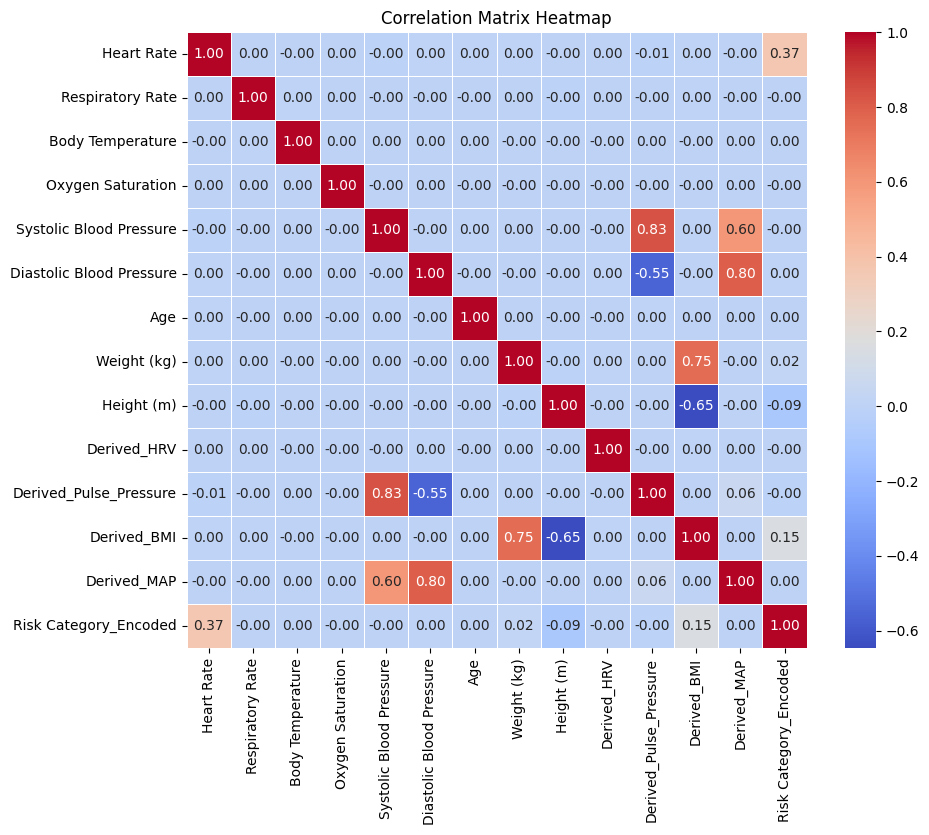

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataframe 'data_encoded' already exists

# Encode the health risk category using the 'Risk Category_High Risk' column (1 for High Risk, 0 for Low Risk)
data_encoded['Risk Category_Encoded'] = data_encoded['Risk Category_High Risk'].apply(lambda x: 1 if x else 0)

# List of continuous columns (vital signs)
vital_sign_columns = [
    'Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)',
    'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'
]

# Calculate the Pearson correlation between each vital sign and health risk category
for column in vital_sign_columns:
    correlation, _ = pearsonr(data_encoded[column], data_encoded['Risk Category_Encoded'])
    print(f"Pearson correlation between {column} and Risk Category: {correlation:.2f}")

# Calculate the correlation matrix for all numerical columns (including the encoded risk category)
correlation_matrix = data_encoded[vital_sign_columns + ['Risk Category_Encoded']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


The correlation analysis between various health indicators and the **Risk Category** (classified as "High Risk" and "Low Risk") provides important insights into the relationships between vital signs and risk classification. Among the variables analyzed, **Heart Rate** stands out with a moderate positive correlation of **0.37** with the **Risk Category**, suggesting that higher heart rates are somewhat associated with an increased likelihood of being classified as "High Risk." This finding indicates that heart rate may be a valuable indicator in assessing a patient's risk status, as it plays a significant role in cardiovascular health. Additionally, **Derived BMI** shows a weak positive correlation of **0.15**, implying that higher BMI values are slightly linked with a higher risk category. However, the correlation is weak enough that BMI alone might not be a strong predictor of health risk.

In contrast, other variables such as **Respiratory Rate**, **Body Temperature**, **Oxygen Saturation**, **Systolic and Diastolic Blood Pressure**, **Age**, **Weight**, **Height**, **Derived HRV**, and **Derived Pulse Pressure** exhibit very weak or negligible correlations with the **Risk Category**. These correlations, near zero or close to no correlation, suggest that they are not directly influential in determining whether a person is categorized as "High Risk" or "Low Risk" within this dataset. For example, **Age** and **Oxygen Saturation** show correlations close to zero, indicating that these factors might not have a substantial impact on the risk classification based on the available data.

The heatmap visualization of the correlation matrix further emphasizes these findings by providing a visual representation of the relationships between each variable and the **Risk Category**. The most noteworthy observation from the heatmap is the stronger correlation between **Heart Rate** and **Risk Category** compared to other variables. This suggests that **Heart Rate** may be one of the more useful features for assessing risk. However, most other variables show minimal interaction with the risk classification, suggesting that additional factors or more complex interactions between variables may need to be explored to improve the predictive power of risk classification models.

Explained Variance Ratio by each Principal Component:
Principal Component 1: 15.82%
Principal Component 2: 15.34%
Principal Component 3: 14.95%
Principal Component 4: 7.74%
Principal Component 5: 7.73%
Principal Component 6: 7.70%
Principal Component 7: 7.70%
Principal Component 8: 7.66%
Principal Component 9: 7.64%
Principal Component 10: 7.64%
Principal Component 11: 0.08%
Principal Component 12: 0.00%
Principal Component 13: 0.00%

Cumulative Explained Variance Ratio:
Up to Principal Component 1: 15.82%
Up to Principal Component 2: 31.16%
Up to Principal Component 3: 46.11%
Up to Principal Component 4: 53.86%
Up to Principal Component 5: 61.59%
Up to Principal Component 6: 69.29%
Up to Principal Component 7: 76.98%
Up to Principal Component 8: 84.64%
Up to Principal Component 9: 92.28%
Up to Principal Component 10: 99.92%
Up to Principal Component 11: 100.00%
Up to Principal Component 12: 100.00%
Up to Principal Component 13: 100.00%


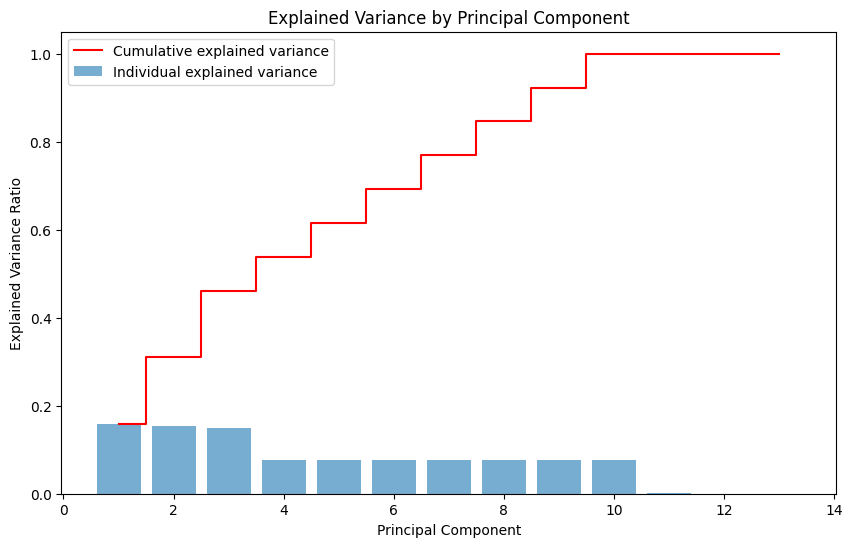


Principal Component Loadings:
        Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
PC1  -4.911127e-03     -3.722641e-04      2.460761e-03       7.489814e-06   
PC2   5.005738e-03      5.350923e-03     -3.017821e-03      -2.366843e-03   
PC3   5.357510e-03     -6.636516e-04     -4.990126e-04       1.208284e-03   
PC4   2.021381e-01      3.437728e-01      5.926211e-01       3.179513e-01   
PC5   5.360226e-01     -4.136513e-01     -1.128234e-01      -2.706171e-01   
PC6   5.619493e-01      2.752175e-01     -3.955008e-01       6.004882e-01   
PC7   1.474745e-01      5.728941e-01      2.695371e-01      -4.816585e-01   
PC8   3.040990e-01      2.463764e-01      1.180708e-02      -2.307170e-01   
PC9   1.935622e-01     -4.706602e-01      6.377880e-01       2.321697e-01   
PC10 -4.519552e-01      1.565527e-01      8.465429e-03       3.548974e-01   
PC11  4.762934e-04      5.349584e-04     -2.581463e-04      -1.144251e-04   
PC12  2.395706e-18      6.763835e-17     -6.8

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: Assuming 'data_encoded' contains the health-related dataset
# List of columns containing vital signs
vital_sign_columns = [
    'Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation',
    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)',
    'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'
]

# Extract only the columns relevant for PCA
data_for_pca = data_encoded[vital_sign_columns]

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Step 2: Apply PCA
pca = PCA(n_components=len(vital_sign_columns))  # Set the number of components to match the number of variables
pca.fit(data_scaled)

# Step 3: Evaluate the proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Step 4: Display the explained variance
print("Explained Variance Ratio by each Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance*100:.2f}%")

# Display the cumulative explained variance
print("\nCumulative Explained Variance Ratio:")
for i, variance in enumerate(cumulative_variance):
    print(f"Up to Principal Component {i+1}: {variance*100:.2f}%")

# Step 5: Visualize the explained variance (Scree plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(vital_sign_columns) + 1), explained_variance, alpha=0.6, align='center', label='Individual explained variance')
plt.step(range(1, len(vital_sign_columns) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.show()

# Step 6: Get and display the loadings for each principal component
loadings = pd.DataFrame(pca.components_, columns=vital_sign_columns, index=[f"PC{i+1}" for i in range(len(vital_sign_columns))])

print("\nPrincipal Component Loadings:")
print(loadings)

# Step 7: Use the first few principal components for further analysis (e.g., dimensionality reduction)
# Let's say we keep enough components to explain over 70% of the variance
num_components_to_keep = next(i for i, variance in enumerate(cumulative_variance) if variance >= 0.70) + 1
print(f"\nNumber of components to retain (explaining over 70% variance): {num_components_to_keep}")

# Reduce the dimensionality using the selected components
pca_reduced = PCA(n_components=num_components_to_keep)
data_reduced = pca_reduced.fit_transform(data_scaled)

# Step 8: Create column names for the new components based on the original column names
# Generate component names like 'PC1', 'PC2', etc.
component_names = [f"PC{i+1}" for i in range(num_components_to_keep)]

# Create a DataFrame for the reduced data with the new component names
pca_df = pd.DataFrame(data_reduced, columns=component_names)

# Display the reduced data with the new component names
print("\nReduced Data (with Principal Components as column names):")
print(pca_df.head())

This dataset uses Principal Component Analysis (PCA) to simplify its complexity while retaining most of the variance. The first seven principal components (PCs) collectively explain 76.98% of the total variance, surpassing the 70% threshold typically used for effective dimensionality reduction. PC1 contributes the most (15.82%), followed by PC2 (15.34%) and PC3 (14.95%). PCs 4 through 7 add 7.74%, 7.73%, 7.70%, and 7.70% respectively, reflecting their importance in capturing critical patterns in the data. Together, these seven components summarize the dataset while maintaining key relationships among features.

The loading patterns of these components offer insights into their primary influences. **PC1** is driven by systolic blood pressure (0.687), derived pulse pressure (0.513), and derived MAP (0.498), indicating its focus on cardiovascular and hemodynamic metrics. **PC2** emphasizes body composition, with derived BMI (0.704) and a negative correlation with height (-0.461). **PC3** highlights diastolic blood pressure (0.709) and a negative association with derived pulse pressure (-0.485), showcasing its link to blood pressure dynamics. **PC4** reflects physiological measures, particularly body temperature (0.593) and respiratory rate (0.344). **PC5** places significant weight on age (0.665), while PCs 6 and 7 show complex relationships involving heart rate, respiratory rate, and derived HRV.

By retaining these seven PCs, the analysis focuses on the most impactful health metrics, capturing both broad patterns and specialized variations. This selection enables a reduction in complexity while preserving the essential variance and relationships in the dataset, providing a clearer lens for understanding the contributions of physiological and derived measures to overall variability.

#### Machine Learning **RQ2: How can machine learning models be developed to predict a patient's health condition from unique health data?**

### Feature Selection

#### Drop Irrelevant Features

In [ ]:
# Drop Patient ID and Timestamp
data_encoded = data_encoded.drop(columns=['Patient ID', 'Timestamp','Gender_Female','Gender_Male'], errors='ignore')

# Display the names of the updated columns
print("\nUpdated Columns:")
print(data_encoded.columns.tolist())



Updated Columns:
['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category_High Risk', 'Risk Category_Low Risk', 'Risk Category_Encoded']


#### Combine 'Risk Category_High Risk' and 'Risk Category_Low Risk' into a single binary target column

In [ ]:

# Assign 1 for High Risk, 0 for Low Risk
data_encoded['Risk_Category'] = data_encoded['Risk Category_High Risk'].astype(int)

# Drop the original 'Risk Category_High Risk' and 'Risk Category_Low Risk' columns
data_encoded = data_encoded.drop(columns=['Risk Category_High Risk', 'Risk Category_Low Risk'], errors='ignore')

# Display the updated columns and the first few rows of the data
print("\nUpdated Columns After Combining Risk Categories:")
print(data_encoded.columns.tolist())
print("\nFirst 5 Rows of Updated Data:")
print(data_encoded.head())



Updated Columns After Combining Risk Categories:
['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk Category_Encoded', 'Risk_Category']

First 5 Rows of Updated Data:
   Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
0    0.000000          0.000000          0.574473           0.140409   
1    0.076923          0.857143          0.341088           0.337884   
2    0.076923          0.428571          0.701369           0.701658   
3    1.000000          0.571429          0.436499           0.002359   
4    0.230769          0.571429          0.650068           0.724763   

   Systolic Blood Pressure  Diastolic Blood Pressure       Age  Weight (kg)  \
0                 0.482759                  0.842105  0.267606     0.830836   
1                 0.551724                  0.73

#### Drop the 'Risk Category_Encoded' column to remove redundancy

In [ ]:
# Drop the 'Risk Category_Encoded' column to remove redundancy
data_encoded = data_encoded.drop(columns=['Risk Category_Encoded'], errors='ignore')

# Display the updated columns and the first few rows of the data
print("\nUpdated Columns After Removing Redundancy:")
print(data_encoded.columns.tolist())
print("\nFirst 5 Rows of Updated Data:")
print(data_encoded.head())



Updated Columns After Removing Redundancy:
['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP', 'Risk_Category']

First 5 Rows of Updated Data:
   Heart Rate  Respiratory Rate  Body Temperature  Oxygen Saturation  \
0    0.000000          0.000000          0.574473           0.140409   
1    0.076923          0.857143          0.341088           0.337884   
2    0.076923          0.428571          0.701369           0.701658   
3    1.000000          0.571429          0.436499           0.002359   
4    0.230769          0.571429          0.650068           0.724763   

   Systolic Blood Pressure  Diastolic Blood Pressure       Age  Weight (kg)  \
0                 0.482759                  0.842105  0.267606     0.830836   
1                 0.551724                  0.736842  0.830986     0.014095   


3. #### Train-Test Split: Dividing dataset into training and testing subsets (e.g., 80% train, 20% test).


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = data_encoded.drop(columns=['Risk_Category'])  # Features
y = data_encoded['Risk_Category']  # Target variable

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")



Training set shape: X_train: (160016, 13), y_train: (160016,)
Testing set shape: X_test: (40004, 13), y_test: (40004,)


#### Logistic Regression
Logistic regression is a strong choice for predicting the Risk Category (High Risk vs. Low Risk) because it is specifically designed for binary classification problems. It outputs probabilities, making it easy to interpret outcomes, which is essential in healthcare, where understanding how different features (e.g., age, blood pressure) influence risk is critical. The model's coefficients provide insight into feature importance, supporting transparent decision-making. Additionally, logistic regression is computationally efficient, requiring fewer resources compared to more complex models. Its simplicity and interpretability make it ideal for healthcare applications where quick, understandable, and actionable predictions are necessary.

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Measure the start time
start_time = time.time()

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Measure the end time
end_time = time.time()

# Evaluate the model's performance
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {logreg_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and display the runtime
logreg_runtime = end_time - start_time
print(f"\nRuntime of the Logistic Regression code: {logreg_runtime:.4f} seconds")


Accuracy: 0.8169

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     19055
           1       0.83      0.82      0.82     20949

    accuracy                           0.82     40004
   macro avg       0.82      0.82      0.82     40004
weighted avg       0.82      0.82      0.82     40004


Confusion Matrix:
[[15554  3501]
 [ 3822 17127]]

Runtime of the Logistic Regression code: 0.3909 seconds


In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Measure the start time
start_time = time.time()

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Measure the end time
end_time = time.time()

# Evaluate the model's performance
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {logreg_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=["Actual Negative", "Actual Positive"],  # Index labels for actual values
    columns=["Predicted Negative", "Predicted Positive"]  # Column labels for predicted values
)

print("\nConfusion Matrix:")
print(conf_matrix_df)

# Calculate and display the runtime
logreg_runtime = end_time - start_time
print(f"\nRuntime of the Logistic Regression code: {logreg_runtime:.4f} seconds")


Accuracy: 0.6347

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60     19055
           1       0.64      0.69      0.66     20949

    accuracy                           0.63     40004
   macro avg       0.63      0.63      0.63     40004
weighted avg       0.63      0.63      0.63     40004


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               11002                8053
Actual Positive                6561               14388

Runtime of the Logistic Regression code: 0.1621 seconds


Cross validation logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the average cross-validation score
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy from Cross-Validation: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")

# Train the model on the entire training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.81546057 0.81886073 0.81639221 0.81776708 0.81789207]
Mean Accuracy from Cross-Validation: 0.8173
Standard Deviation of Accuracy: 0.0012

Accuracy on Test Set: 0.8169

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     19055
           1       0.83      0.82      0.82     20949

    accuracy                           0.82     40004
   macro avg       0.82      0.82      0.82     40004
weighted avg       0.82      0.82      0.82     40004


Confusion Matrix:
[[15554  3501]
 [ 3822 17127]]


logistic regression with PCA consideration

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Measure the start time
start_time = time.time()

X = pca_df  # The reduced dataset after PCA transformation (features)
y = data_encoded['Risk_Category']  # Replace with your actual target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Measure the end time
end_time = time.time()

# Evaluate the model's performance on the test set
pca_logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"pca_logistic_accuracy {pca_logistic_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and display the runtime
pca_logistic_runtime = end_time - start_time
print(f"\npca_logistic_runtime: {pca_logistic_runtime:.4f} seconds")

pca_logistic_accuracy 0.6347

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60     19055
           1       0.64      0.69      0.66     20949

    accuracy                           0.63     40004
   macro avg       0.63      0.63      0.63     40004
weighted avg       0.63      0.63      0.63     40004


Confusion Matrix:
[[11002  8053]
 [ 6561 14388]]

pca_logistic_runtime: 0.1659 seconds


## Random Forest




**Handling Complex Interactions**: Random Forest excels at capturing complex non-linear relationships and interactions among features. In healthcare datasets, various factors like **heart rate**, **blood pressure**, and **age** interact in intricate ways to influence a patient’s risk category. Random Forest can model these interactions without requiring explicit feature engineering, making it ideal for this task.

 **Feature Importance**: One of the key advantages of Random Forest is its ability to provide insights into **feature importance**. By analyzing the importance of variables such as **oxygen saturation** or **derived BMI**, healthcare professionals can understand which features contribute most to predicting risk. This interpretability is particularly valuable in clinical decision-making.

RandomForest

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Measure the start time
start_time = time.time()

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Measure the end time
end_time = time.time()

# Evaluate the model's performance
randomf_accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy: {randomf_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and display the runtime
randomf_runtime = end_time - start_time
print(f"\nrandomf_runtime of the entire process: {randomf_runtime:.4f} seconds")


Training set shape: X_train: (160016, 7), y_train: (160016,)
Testing set shape: X_test: (40004, 7), y_test: (40004,)

Random Forest Accuracy: 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     19055
           1       0.92      0.88      0.90     20949

    accuracy                           0.89     40004
   macro avg       0.89      0.89      0.89     40004
weighted avg       0.89      0.89      0.89     40004


Confusion Matrix:
[[17387  1668]
 [ 2602 18347]]

randomf_runtime of the entire process: 77.0544 seconds


Cross Validation of Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy from Cross-Validation: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")

# Train the model on the entire training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the test set
randomf_accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy on Test Set: {randomf_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training set shape: X_train: (160016, 7), y_train: (160016,)
Testing set shape: X_test: (40004, 7), y_test: (40004,)

Cross-Validation Accuracy Scores: [0.89732533 0.89479111 0.89269756 0.89654095 0.89738462]
Mean Accuracy from Cross-Validation: 0.8957
Standard Deviation of Accuracy: 0.0018

Random Forest Accuracy on Test Set: 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     19055
           1       0.92      0.88      0.90     20949

    accuracy                           0.89     40004
   macro avg       0.89      0.89      0.89     40004
weighted avg       0.89      0.89      0.89     40004


Confusion Matrix:
[[17387  1668]
 [ 2602 18347]]


Random Forest on reduced dataset after PCA transformation (features)

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Measure the start time for the entire process
start_time = time.time()

# Assuming pca_df and data_encoded are already defined with your PCA transformed data and encoded target variable
X = pca_df  # The reduced dataset after PCA transformation (features)
y = data_encoded['Risk_Category']  # Replace with your actual target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Measure the start time for training
train_start_time = time.time()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Measure the end time for training
end_time = time.time()

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the test set
pca_randomf_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Set: {pca_randomf_accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Calculate and display the runtime
pca_randomf_runtime = end_time - start_time
print(f"\npca_randomf_runtime: {pca_randomf_runtime:.4f} seconds")



Training set shape: X_train: (160016, 7), y_train: (160016,)
Testing set shape: X_test: (40004, 7), y_test: (40004,)

Accuracy on Test Set: 0.8169

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     19055
           1       0.92      0.88      0.90     20949

    accuracy                           0.89     40004
   macro avg       0.89      0.89      0.89     40004
weighted avg       0.89      0.89      0.89     40004


Confusion Matrix:
[[17387  1668]
 [ 2602 18347]]

pca_randomf_runtime: 75.0733 seconds


Combination graph

<ipython-input-29-8fc72c99ae50>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


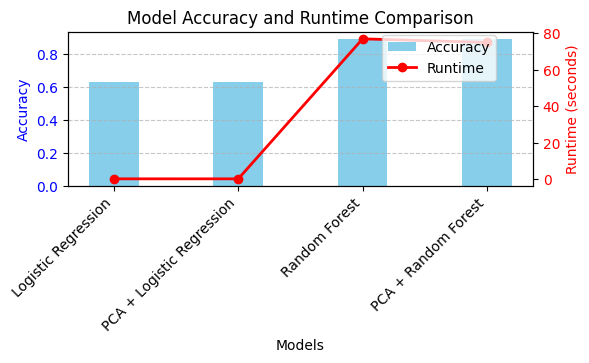

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store model names, accuracies, and runtimes
accuracies = [logreg_accuracy, pca_logistic_accuracy, randomf_accuracy, pca_randomf_accuracy]
runtimes = [logreg_runtime, pca_logistic_runtime, randomf_runtime, pca_randomf_runtime]

# Model names
models = ['Logistic Regression', 'PCA + Logistic Regression', 'Random Forest', 'PCA + Random Forest']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(6, 2))

# Plot accuracy as a bar chart
bar_width = 0.4
x = np.arange(len(models))  # x-axis positions for the bars
bars = ax1.bar(x, accuracies, bar_width, label='Accuracy', color='skyblue')

# Configure the primary y-axis for accuracy
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='blue')
ax1.set_title('Model Accuracy and Runtime Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary y-axis for runtime
ax2 = ax1.twinx()
line, = ax2.plot(x, runtimes, color='red', label='Runtime', marker='o', linewidth=2)

# Configure the secondary y-axis for runtime
ax2.set_ylabel('Runtime (seconds)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))

# Display gridlines for clarity
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-30-a1afd0c65396>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


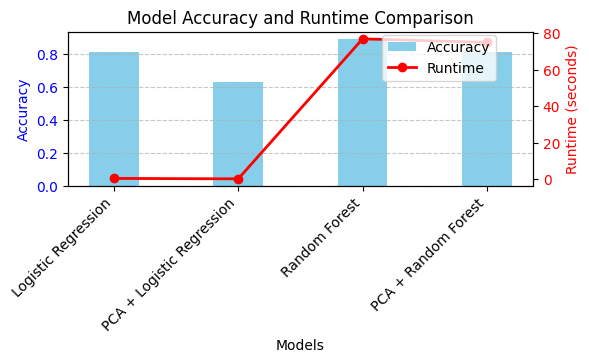

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Directly store the values for accuracies and runtimes
accuracies = [0.8169, 0.6347, 0.8933, 0.8169]
runtimes = [0.3909, 0.1659, 77.0544, 75.0733]

# Model names
models = ['Logistic Regression', 'PCA + Logistic Regression', 'Random Forest', 'PCA + Random Forest']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(6, 2))

# Plot accuracy as a bar chart
bar_width = 0.4
x = np.arange(len(models))  # x-axis positions for the bars
bars = ax1.bar(x, accuracies, bar_width, label='Accuracy', color='skyblue')

# Configure the primary y-axis for accuracy
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='blue')
ax1.set_title('Model Accuracy and Runtime Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary y-axis for runtime
ax2 = ax1.twinx()
line, = ax2.plot(x, runtimes, color='red', label='Runtime', marker='o', linewidth=2)

# Configure the secondary y-axis for runtime
ax2.set_ylabel('Runtime (seconds)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9))

# Display gridlines for clarity
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()